#Dla danych “CIFAR10 small image classification” z biblioteki Keras zaproponuj i zrealizuj podział tych danych na dane treningowe i dane testowe,

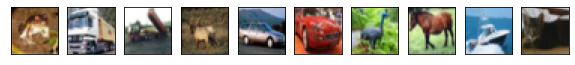

In [20]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

plt.figure(figsize = (10,10))

for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)

plt.show()

#W oparciu o sieć konwolucyjną, zgodnie z wskazaniami prowadzącego, zaproponuj klasyfikator, klasyfikujący dwie z dziesięciu klas



In [22]:
from tensorflow.keras.utils import to_categorical

def selection(data):
  y = 0

  for i in range(len(data)):
    if data[i] == 0 or data[i] == 1 or data[i] == 8  or data[i] == 9:
      data[i] = 0
    elif  data[i] == 2 or data[i] == 3 or data[i] == 4  or data[i] == 5  or data[i] == 6 or data[i] == 7:
      data[i] = 1

selection(y_train)
selection(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_train, y_train))

model.save('miw_s20973_f_{}_fit.h5'.format(1))

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 1.7335 - accuracy: 0.8071 - val_loss: 0.4562 - val_accuracy: 0.8288
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4320 - accuracy: 0.8415 - val_loss: 0.3633 - val_accuracy: 0.8626
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 0.4200 - accuracy: 0.8460 - val_loss: 0.3868 - val_accuracy: 0.8539
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4153 - accuracy: 0.8476 - val_loss: 0.3358 - val_accuracy: 0.8784
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4043 - accuracy: 0.8503 - val_loss: 0.4718 - val_accuracy: 0.8130
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.4031 - accuracy: 0.8497 - val_loss: 0.6146 - val_accuracy: 0.7644
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4046 - accuracy: 0.8528 - val_loss: 0.3569 - val_accuracy: 0.8719
Epoch 

In [30]:
from tensorflow import keras
model = keras.models.load_model('miw_s20973_f_{}_fit.h5'.format(1))
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

accuracy: 0.8303800225257874
loss: 0.4870626926422119


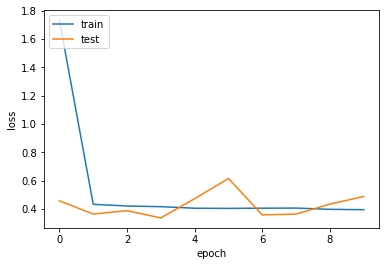

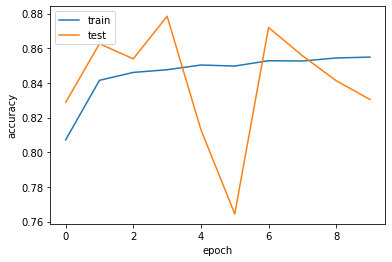

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Zaproponuj klasyfikator z jedną, dwiema oraz trzema warstwami konwolucyjnymi,

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

print("___________________________________")

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_data=(X_train, y_train))
model.save('miw_s20973_f_{}_fit.h5'.format(1))

print("___________________________________")

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_data=(X_train, y_train))
model.save('miw_s20973_f_{}_fit.h5'.format(2))

print("___________________________________")

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_data=(X_train, y_train))
model.save('miw_s20973_f_{}_fit.h5'.format(3))

print("___________________________________")

___________________________________
Epoch 1/4
782/782 [==============================] - 7s 8ms/step - loss: 3.4302 - accuracy: 0.7969 - val_loss: 0.4068 - val_accuracy: 0.8462
Epoch 2/4
782/782 [==============================] - 5s 7ms/step - loss: 0.4462 - accuracy: 0.8328 - val_loss: 0.4319 - val_accuracy: 0.8360
Epoch 3/4
782/782 [==============================] - 5s 7ms/step - loss: 0.4286 - accuracy: 0.8413 - val_loss: 0.4576 - val_accuracy: 0.8080
Epoch 4/4
782/782 [==============================] - 5s 7ms/step - loss: 0.4213 - accuracy: 0.8439 - val_loss: 0.4592 - val_accuracy: 0.8207
___________________________________
Epoch 1/4
782/782 [==============================] - 6s 7ms/step - loss: 0.9051 - accuracy: 0.7909 - val_loss: 0.3683 - val_accuracy: 0.8590
Epoch 2/4
782/782 [==============================] - 6s 7ms/step - loss: 0.3595 - accuracy: 0.8587 - val_loss: 0.3933 - val_accuracy: 0.8498
Epoch 3/4
782/782 [==============================] - 6s 7ms/step - loss: 0.3232 - 

#Porównaj wyniki z poprzedniego punktu i zaproponuj optymalny klasyfikator dla danego problemu.

___________________________________
accuracy: 0.8207200169563293
loss: 0.4591837525367737


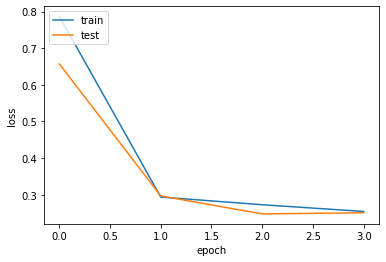

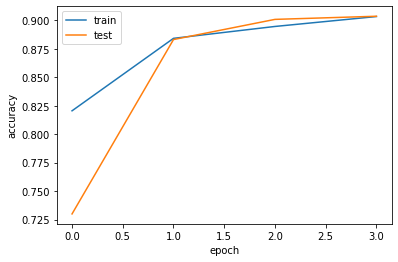

___________________________________
accuracy: 0.7292600274085999
loss: 1.236904263496399


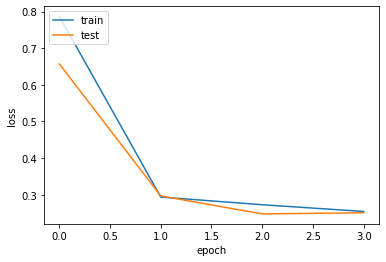

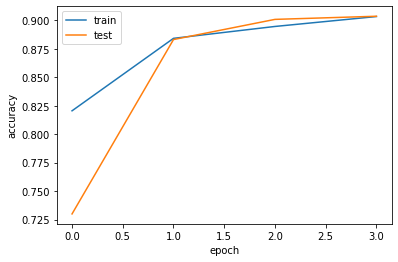

___________________________________
accuracy: 0.9036399722099304
loss: 0.2506038248538971


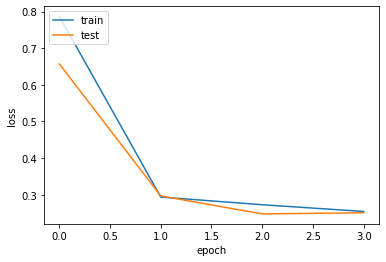

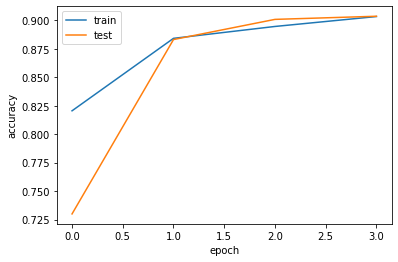

___________________________________


In [34]:
from tensorflow import keras

print("___________________________________")

model = keras.models.load_model('miw_s20973_f_{}_fit.h5'.format(1))
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("___________________________________")

model = keras.models.load_model('miw_s20973_f_{}_fit.h5'.format(2))
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("___________________________________")

model = keras.models.load_model('miw_s20973_f_{}_fit.h5'.format(3))
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("___________________________________")